# Cosmic Variance Cancelling Test

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import euclidemu2 as ee2

In [2]:
# Load reference simulation
ref_path = "/home/grads/data/victoria/w0wa_test/sims/"
k, pk_nl_ref, pk_lin_ref = np.loadtxt(f"{ref_path}/a/pofk_run_ref_cb_z0.000.txt", unpack=True, usecols=(0, 1, 2), skiprows=2)
boost_ref_cola = pk_nl_ref/pk_lin_ref
params = {
    "h": 0.67,
    "Omega_b": 0.049,
    "Omega_m": 0.319,
    "As": 2.1e-9,
    "ns": 0.96,
    "w": -1,
    "wa": 0,
    "mnu": 0.058
}
k, boost_ref_ee2 = ee2.get_boost(params, [0], k)
# ref_b = np.loadtxt(f"{ref_path}/b/pofk_run_ref_cb_z0.000.txt", unpack=True, usecols=(0, 1, 2))

In [3]:
# Load COLA simulations
lhs = np.loadtxt("../lhs.txt")
simulations_path = "../output/"
phase_a = []
phase_b = []
proj_a = []
proj_b = []
no_pairfix = []
no_pairfix_proj = []
for i in range(5):
    phase_a.append(np.loadtxt(f"{simulations_path}/a/{i}/pofk_run_{i}_cb_z0.000.txt", unpack=True, usecols=(0, 1, 2), skiprows=2))
    phase_b.append(np.loadtxt(f"{simulations_path}/b/{i}/pofk_run_{i}_cb_z0.000.txt", unpack=True, usecols=(0, 1, 2), skiprows=2))
    proj_a.append(np.loadtxt(f"{simulations_path}/projected_a/{i}/pofk_run_{i}_cb_z0.000.txt", unpack=True, usecols=(0, 1, 2), skiprows=2))
    proj_b.append(np.loadtxt(f"{simulations_path}/projected_b/{i}/pofk_run_{i}_cb_z0.000.txt", unpack=True, usecols=(0, 1, 2), skiprows=2))
    no_pairfix.append(np.loadtxt(f"{simulations_path}/no_pairfix/{i}/pofk_run_{i}_cb_z0.000.txt", unpack=True, usecols=(0, 1, 2), skiprows=2))
    no_pairfix_proj.append(np.loadtxt(f"{simulations_path}/no_pairfix_projected/{i}/pofk_run_{i}_cb_z0.000.txt", unpack=True, usecols=(0, 1, 2), skiprows=2))

Exception: Parameter range violation: 
Omega_b is set to 0.039652, but should be in the interval [0.04, 0.06].
EuclidEmulator2 emulates the non-linear correction in 
the interval [8.73e-3 h/Mpc, 9.41h/Mpc]. You are 
requesting k modes below k_min = 8.73e-3 h/Mpc. 
Lower k modes constantly extrapolated.
EuclidEmulator2 emulates the non-linear correction in 
the interval [8.73e-3 h/Mpc, 9.41h/Mpc]. You are 
requesting k modes below k_min = 8.73e-3 h/Mpc. 
Lower k modes constantly extrapolated.
Exception: Parameter range violation: 
n_s is set to 0.918764, but should be in the interval [0.92, 1.00].
EuclidEmulator2 emulates the non-linear correction in 
the interval [8.73e-3 h/Mpc, 9.41h/Mpc]. You are 
requesting k modes below k_min = 8.73e-3 h/Mpc. 
Lower k modes constantly extrapolated.


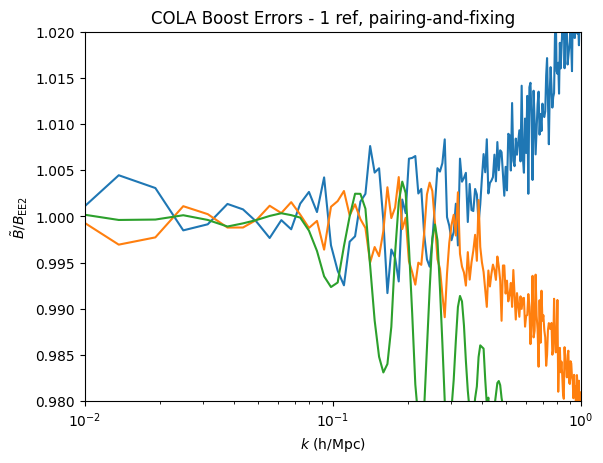

In [74]:
# Plot boost (1 ref) with pair-fixing
for i in range(5):
    h, Omega_b, Omega_m, As, ns, w, wa = lhs[i]
    k, pk_nl_a, pk_lin =  phase_a[i]
    k, pk_nl_b, pk_lin =  phase_b[i]
    params = {
        "h": h,
        "Omega_b": Omega_b,
        "Omega_m": Omega_m,
        "As": As,
        "ns": ns,
        "w": w,
        "wa": wa,
        "mnu": 0.058
    }
    try:
        k, boost_ee2 = ee2.get_boost(params, [0], k)
    except Exception as err:
        print(f"Exception: {err}")
        continue
    pk_nl = (pk_nl_a + pk_nl_a)/2
    boost_cola = pk_nl/pk_lin
    plt.semilogx(k, boost_ref_ee2[0]*boost_cola/boost_ref_cola/boost_ee2[0])
plt.xlim([1e-2, 1])
plt.ylim([0.98, 1.02])
plt.title("COLA Boost Errors - 1 ref, pairing-and-fixing")
plt.xlabel(fr"$k$ (h/Mpc)")
plt.ylabel(fr"$\tilde{{B}}/B_\mathrm{{EE2}}$")
plt.savefig("pairfix.pdf")
plt.show()

Exception: Parameter range violation: 
Omega_b is set to 0.039652, but should be in the interval [0.04, 0.06].
EuclidEmulator2 emulates the non-linear correction in 
the interval [8.73e-3 h/Mpc, 9.41h/Mpc]. You are 
requesting k modes below k_min = 8.73e-3 h/Mpc. 
Lower k modes constantly extrapolated.
EuclidEmulator2 emulates the non-linear correction in 
the interval [8.73e-3 h/Mpc, 9.41h/Mpc]. You are 
requesting k modes below k_min = 8.73e-3 h/Mpc. 
Lower k modes constantly extrapolated.
EuclidEmulator2 emulates the non-linear correction in 
the interval [8.73e-3 h/Mpc, 9.41h/Mpc]. You are 
requesting k modes below k_min = 8.73e-3 h/Mpc. 
Lower k modes constantly extrapolated.
EuclidEmulator2 emulates the non-linear correction in 
the interval [8.73e-3 h/Mpc, 9.41h/Mpc]. You are 
requesting k modes below k_min = 8.73e-3 h/Mpc. 
Lower k modes constantly extrapolated.
Exception: Parameter range violation: 
n_s is set to 0.918764, but should be in the interval [0.92, 1.00].
EuclidEmul

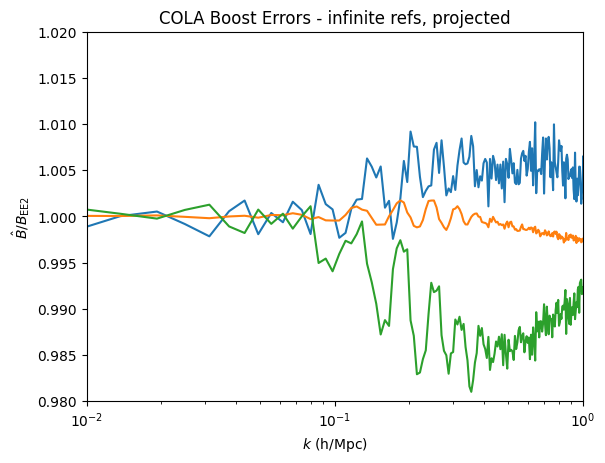

In [75]:
# Plot boost (inf refs) for projections
for i in range(5):
    h, Omega_b, Omega_m, As, ns, w, wa = lhs[i]
    params = {
        "h": h,
        "Omega_b": Omega_b,
        "Omega_m": Omega_m,
        "As": As,
        "ns": ns,
        "w": -1,
        "wa": 0,
        "mnu": 0.058
    }
    try:
        k, boost_proj_ee2 = ee2.get_boost(params, [0], k)
        params["w"] = w
        params["wa"] = wa
        k, boost_ee2 = ee2.get_boost(params, [0], k)
    except Exception as err:
        print(f"Exception: {err}")
        continue
    k, pk_nl_npf, pk_lin =  no_pairfix[i]
    k, pk_nl_npf_proj, pk_lin_proj =  no_pairfix_proj[i]
    boost_cola = pk_nl_npf/pk_lin
    boost_proj_cola = pk_nl_npf_proj/pk_lin_proj
    plt.semilogx(k, boost_proj_ee2[0]*boost_cola/boost_proj_cola/boost_ee2[0])
plt.xlim([1e-2, 1])
plt.ylim([0.98, 1.02])
plt.title("COLA Boost Errors - infinite refs, projected")
plt.xlabel(fr"$k$ (h/Mpc)")
plt.ylabel(fr"$\hat{{B}}/B_\mathrm{{EE2}}$")
plt.savefig("projected.pdf")
plt.show()

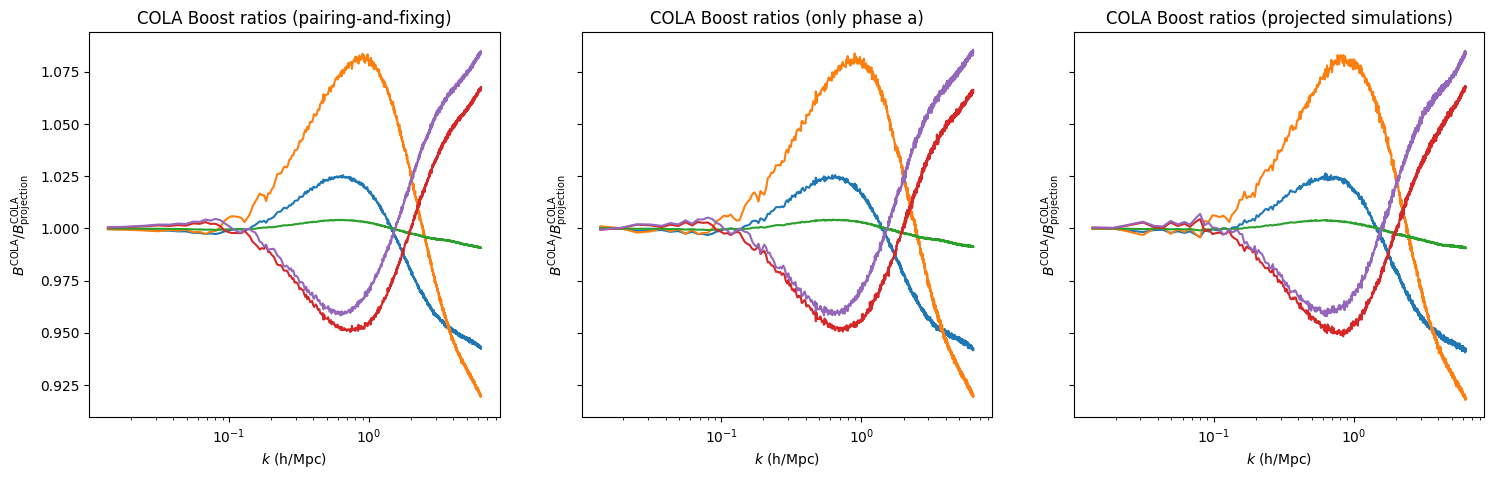

In [15]:
# Jonathan's suggestion: plot B^COLA/B^COLA_proj for both cases
# Plot emulated quantity
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for i in range(5):
    k, pk_nl_a, pk_lin =  phase_a[i]
    k, pk_nl_b, pk_lin =  phase_b[i]
    k, pk_nl_proj_a, pk_lin_proj =  proj_a[i]
    k, pk_nl_proj_b, pk_lin_proj =  proj_b[i]
    pk_nl = (pk_nl_a + pk_nl_b)/2
    pk_nl_proj = (pk_nl_proj_a + pk_nl_proj_b)/2
    b_cola_a = pk_nl_a/pk_lin
    b_cola_proj_a = pk_nl_proj_a/pk_lin_proj
    b_cola = pk_nl/pk_lin
    b_cola_proj = pk_nl_proj/pk_lin_proj
    axs[0].semilogx(k, b_cola/b_cola_proj)
    axs[1].semilogx(k, b_cola_a/b_cola_proj_a)

    k, pk_nl_npf, pk_lin =  no_pairfix[i]
    k, pk_nl_npf_proj, pk_lin_proj =  no_pairfix_proj[i]
    boost_cola = pk_nl_npf/pk_lin
    boost_proj_cola = pk_nl_npf_proj/pk_lin_proj
    axs[2].semilogx(k, boost_cola/boost_proj_cola)

axs[0].set_title("COLA Boost ratios (pairing-and-fixing)")
axs[1].set_title("COLA Boost ratios (only phase a)")
axs[2].set_title("COLA Boost ratios (projected simulations)")
for ax in axs: 
    ax.set_xlabel(r"$k$ (h/Mpc)")
    ax.set_ylabel(r"$B^\mathrm{COLA}/B^\mathrm{COLA}_\mathrm{projection}$")
plt.savefig("boost_ratios_comparison.pdf")

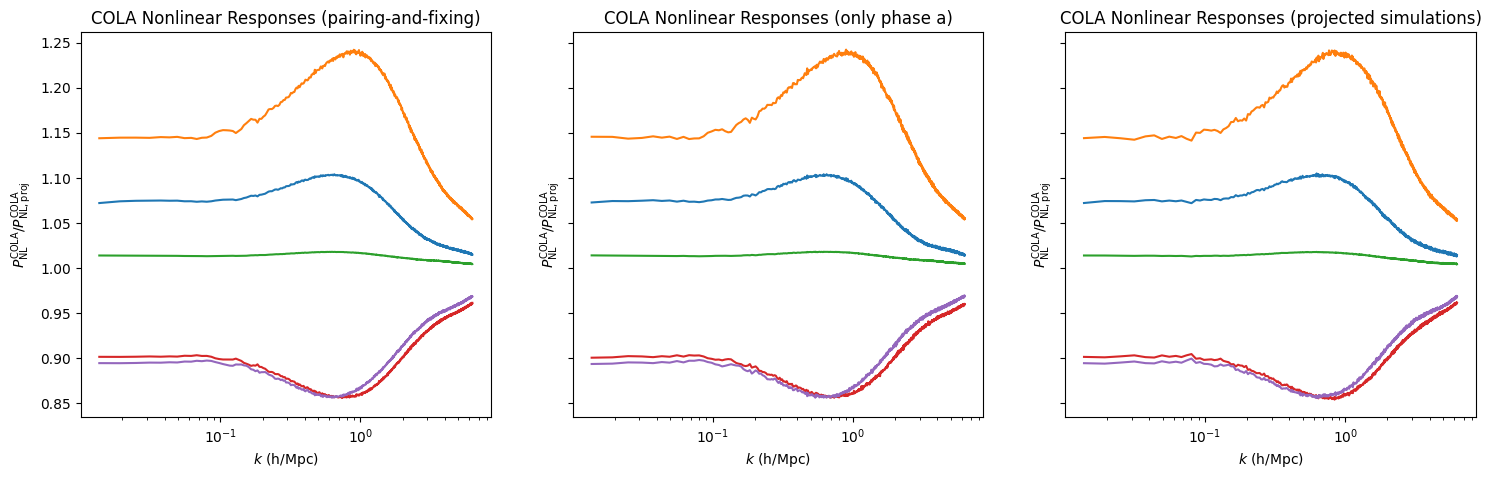

In [5]:
# Jonathan's suggestion: plot B^COLA/B^COLA_proj for both cases
# Plot emulated quantity
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for i in range(5):
    k, pk_nl_a, pk_lin =  phase_a[i]
    k, pk_nl_b, pk_lin =  phase_b[i]
    k, pk_nl_proj_a, pk_lin_proj =  proj_a[i]
    k, pk_nl_proj_b, pk_lin_proj =  proj_b[i]
    pk_nl = (pk_nl_a + pk_nl_b)/2
    pk_nl_proj = (pk_nl_proj_a + pk_nl_proj_b)/2
    axs[0].semilogx(k, pk_nl/pk_nl_proj)
    axs[1].semilogx(k, pk_nl_a/pk_nl_proj_a)

    k, pk_nl_npf, pk_lin =  no_pairfix[i]
    k, pk_nl_npf_proj, pk_lin_proj =  no_pairfix_proj[i]
    axs[2].semilogx(k, pk_nl_npf/pk_nl_npf_proj)

axs[0].set_title("COLA Nonlinear Responses (pairing-and-fixing)")
axs[1].set_title("COLA Nonlinear Responses (only phase a)")
axs[2].set_title("COLA Nonlinear Responses (projected simulations)")
for ax in axs: 
    ax.set_xlabel(r"$k$ (h/Mpc)")
    ax.set_ylabel(r"$P_\mathrm{NL}^\mathrm{COLA}/P_\mathrm{NL, proj}^\mathrm{COLA}$")
plt.savefig("response_comparison.pdf")